In [1]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [3]:
import numpy as np
noise = np.random.normal(loc=0, scale=0.5, size=X_test.shape)
X_test_noisy = np.clip(X_test + noise, 0, 1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test_noisy)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test_noisy)

In [6]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[2057    1    0    0    0    1    1    0   11    0]
 [   0 2313   15    6    1    0    5    9    7    7]
 [  32    1 1995   15    5    2    5   13   27    2]
 [  19    4   15 1961    0   37    3   11   87    5]
 [  12    8    4    0 1827    0   15    8   15  158]
 [  36    1    0   66    0 1658   35    0   81   17]
 [  29    3    2    0    2   11 1994    0   22    0]
 [   7    7   19    5    9    0    0 2056   14   71]
 [  29   18    4   22    1   15    6    1 1935   17]
 [  22   11    1   19   14    4    2   27   42 1945]]


In [7]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2071
           1       0.98      0.98      0.98      2363
           2       0.97      0.95      0.96      2097
           3       0.94      0.92      0.93      2142
           4       0.98      0.89      0.94      2047
           5       0.96      0.88      0.92      1894
           6       0.97      0.97      0.97      2063
           7       0.97      0.94      0.95      2188
           8       0.86      0.94      0.90      2048
           9       0.88      0.93      0.90      2087

    accuracy                           0.94     21000
   macro avg       0.94      0.94      0.94     21000
weighted avg       0.94      0.94      0.94     21000



In [8]:
y_kneighbors = knn.kneighbors(X_test_noisy, return_distance=False)

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

def AHBshow(num):
  noisy = X_test_noisy[num].reshape(28,28)
  img = y_kneighbors[num][0]
  org = X_train[img].reshape(28,28)
  fig, axs = plt.subplots(1, 2, figsize=(10, 20))
  axs[0].imshow(noisy)
  axs[0].set_title("Before:")
  axs[0].axis("off")
  axs[1].imshow(org)
  axs[1].set_title("After:")
  axs[1].axis("off")
  plt.show()
  return 

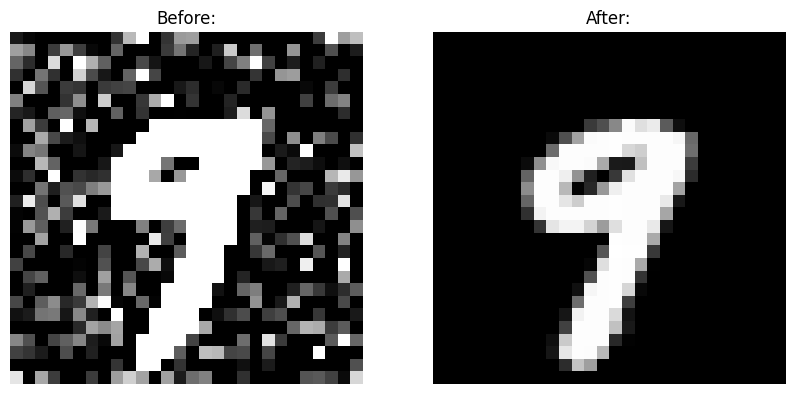

In [95]:
AHBshow(5)

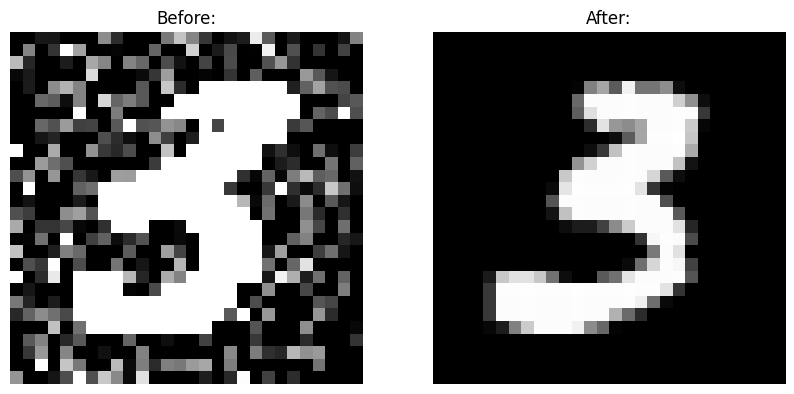

In [96]:
AHBshow(25)


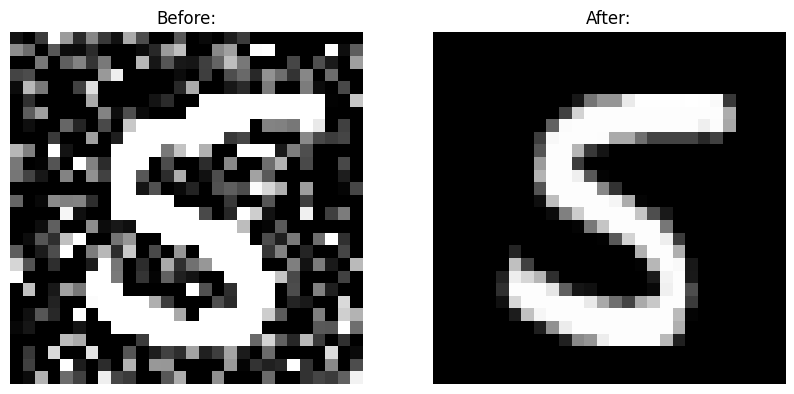

In [97]:
AHBshow(820)


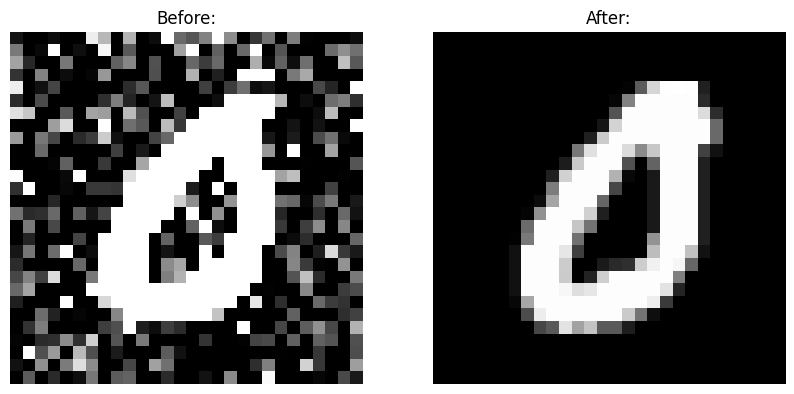

In [98]:
AHBshow(1005)


In [10]:
y_pred

array(['7', '8', '2', ..., '4', '6', '4'], dtype=object)

In [12]:
y_test

22167    7
3842     8
60035    2
43391    2
25028    3
        ..
67612    5
42809    4
18445    4
15995    6
2665     4
Name: class, Length: 21000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [15]:
for i in range(len(y_pred)):
  print("{}  : {}  -  {} *** {}".format(i, y_pred[i], y_test.values[i], y_pred[i] == y_test.values[i]))


Streaming output truncated to the last 5000 lines.
16000  : 8  -  5 *** False
16001  : 1  -  1 *** True
16002  : 1  -  1 *** True
16003  : 8  -  8 *** True
16004  : 7  -  7 *** True
16005  : 9  -  9 *** True
16006  : 3  -  3 *** True
16007  : 4  -  4 *** True
16008  : 3  -  3 *** True
16009  : 1  -  1 *** True
16010  : 3  -  3 *** True
16011  : 6  -  6 *** True
16012  : 4  -  4 *** True
16013  : 1  -  1 *** True
16014  : 2  -  1 *** False
16015  : 7  -  7 *** True
16016  : 6  -  6 *** True
16017  : 5  -  5 *** True
16018  : 7  -  7 *** True
16019  : 6  -  6 *** True
16020  : 8  -  8 *** True
16021  : 3  -  3 *** True
16022  : 1  -  1 *** True
16023  : 1  -  1 *** True
16024  : 8  -  8 *** True
16025  : 4  -  4 *** True
16026  : 1  -  1 *** True
16027  : 0  -  0 *** True
16028  : 7  -  7 *** True
16029  : 8  -  8 *** True
16030  : 4  -  4 *** True
16031  : 6  -  6 *** True
16032  : 6  -  6 *** True
16033  : 2  -  2 *** True
16034  : 3  -  3 *** True
16035  : 7  -  7 *** True
16036  : 8 

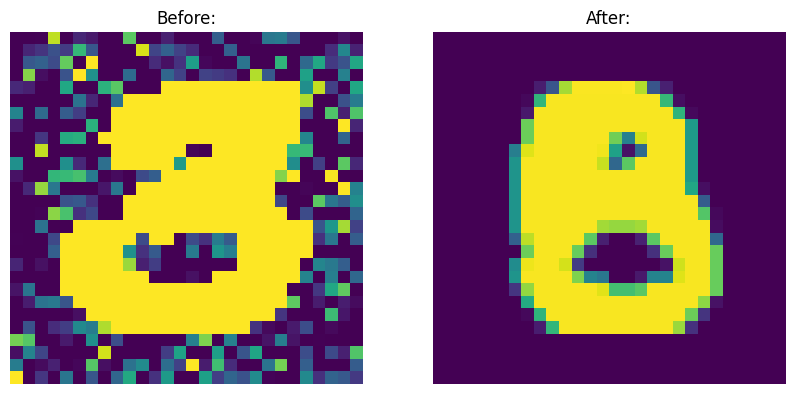

In [18]:
AHBshow(20804)